In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Reading and Prepration

In [8]:
data=pd.read_csv('data.csv')

In [9]:
data.shape

(246739, 16)

In [ ]:
#takes only on budget segment for memory utilization
data=data[data['PREMIUM_CUSTOMER']=='Budget']

In [11]:
data.shape

(86762, 16)

## Create Customer Ratings

In [12]:
#create ratings for product based on the sum of the product quantity bought by each customer
dataRatings=data.join(data.groupby(['LYLTY_CARD_NBR','PROD_NAME'])['PROD_QTY'].sum(), on=['LYLTY_CARD_NBR','PROD_NAME'], rsuffix='_rating')

In [13]:
dataRatings.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PROD_NAME_CLN', 'PACK_SIZE',
       'BRAND', 'DATE_MON', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'UNIT_PRICE',
       'PRICE_RANGE', 'PROD_QTY_rating'],
      dtype='object')

## Feature Selection

In [14]:
dataRatings=dataRatings[['LYLTY_CARD_NBR','PROD_NBR','PROD_NAME','PROD_QTY_rating']]

In [15]:
#rename rating column
dataRatings.rename(columns = {'PROD_QTY_rating':'RATING'}, inplace = True)

## Rating Normalization

In [16]:
#make rating range from 0 to 5
max_rate=dataRatings['RATING'].max()
dataRatings['RATING']=(dataRatings['RATING']*5)/max_rate

## Check For Duplicates

In [17]:
dataRatings.duplicated().sum()

2173

In [18]:
dataRatings.drop_duplicates(inplace=True)

In [19]:
dataRatings['RATING'].unique()

array([1.875, 1.25 , 3.125, 0.625, 2.5  , 3.75 , 4.375, 5.   ])

## Create Products Ratings

In [20]:
#create a dataframe for products with their average rating from all customers
ratings=pd.DataFrame(dataRatings.groupby('PROD_NAME')['RATING'].mean())
ratings.head()

,RATING
PROD_NAME,
Burger Rings 220g,1.224376
CCs Nacho Cheese 175g,1.224909
CCs Original 175g,1.211735
CCs Tasty Cheese 175g,1.177195
Cheetos Chs & Bacon Balls 190g,1.207224


In [21]:
#count number of times customers have rated each product
ratings['NUM_OF_RATINGS']=dataRatings.groupby('PROD_NAME')['RATING'].count()
ratings=ratings.sort_values(by='NUM_OF_RATINGS',ascending=False)

#show most 5 popular products among customers
ratings.head()

,RATING,NUM_OF_RATINGS
PROD_NAME,,
Kettle Mozzarella Basil & Pesto 175g,1.246152,1137
Cobs Popd Sea Salt Chips 110g,1.227416,1107
Kettle Tortilla ChpsHny&Jlpno Chili 150g,1.232939,1099
Doritos Corn Chip Southern Chicken 150g,1.240901,1099
Doritos Corn Chips Cheese Supreme 170g,1.241438,1095



popular products are:


*   Kettle Mozzarella Basil & Pesto 175g
*   Cobs Popd Sea Salt Chips 110g
*   Kettle Tortilla ChpsHny&Jlpno Chili 150g
*   Doritos Corn Chip Southern Chicken 150g
*   Doritos Corn Chips Cheese Supreme 170g




# EDA

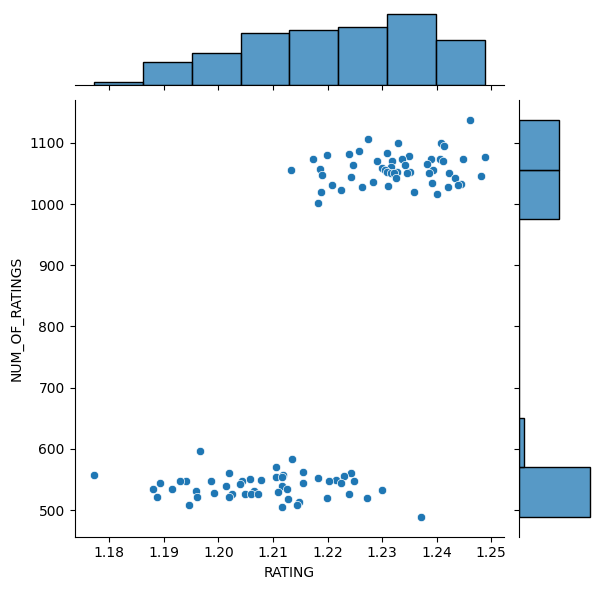

In [22]:
sns.jointplot(x='RATING',y='NUM_OF_RATINGS',data=ratings)

notes:

*   popular products tend to have higher rating
*   most products has an average rating around 1.20



# Customer-Product Interaction Matrix

In [23]:
#creating Customer-product interaction matrix, if Customer had bought the products then the rating is added if not then NaN
matrix = dataRatings.pivot_table(index='LYLTY_CARD_NBR', columns='PROD_NAME', values='RATING')
matrix.head()

PROD_NAME,Burger Rings 220g,CCs Nacho Cheese 175g,CCs Original 175g,CCs Tasty Cheese 175g,Cheetos Chs & Bacon Balls 190g,Cheetos Puffs 165g,Cheezels Cheese 330g,Cheezels Cheese Box 125g,Cobs Popd Sea Salt Chips 110g,Cobs Popd Sour Crm &Chives Chips 110g,...,Tyrrells Crisps Ched & Chives 165g,Tyrrells Crisps Lightly Salted 165g,WW Crinkle Cut Chicken 175g,WW Crinkle Cut Original 175g,WW D/Style Chip Sea Salt 200g,WW Original Corn Chips 200g,WW Original Stacked Chips 160g,WW Sour Cream &OnionStacked Chips 160g,WW Supreme Cheese Corn Chips 200g,Woolworths Cheese Rings 190g
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,,
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013,NaN,NaN,NaN,1.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Normalization

In [24]:
# Normalize customer-product matrix
# if rating less that customer's average rating then rating=negative value other wise rating=positive value
matrixNorm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrixNorm.head()

PROD_NAME,Burger Rings 220g,CCs Nacho Cheese 175g,CCs Original 175g,CCs Tasty Cheese 175g,Cheetos Chs & Bacon Balls 190g,Cheetos Puffs 165g,Cheezels Cheese 330g,Cheezels Cheese Box 125g,Cobs Popd Sea Salt Chips 110g,Cobs Popd Sour Crm &Chives Chips 110g,...,Tyrrells Crisps Ched & Chives 165g,Tyrrells Crisps Lightly Salted 165g,WW Crinkle Cut Chicken 175g,WW Crinkle Cut Original 175g,WW D/Style Chip Sea Salt 200g,WW Original Corn Chips 200g,WW Original Stacked Chips 160g,WW Sour Cream &OnionStacked Chips 160g,WW Supreme Cheese Corn Chips 200g,Woolworths Cheese Rings 190g
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,,
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013,NaN,NaN,NaN,0.3125,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Similarity Matrix using Pearson correlation


In [25]:
# Customer similarity matrix using Pearson correlation
customerSimilarity = matrixNorm.T.corr()
customerSimilarity.head()

LYLTY_CARD_NBR,1003,1007,1013,1022,1025,1043,1046,1050,1051,1052,...,2330191,2330211,2330251,2330311,2330331,2330461,2330501,2370361,2370581,2370961
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,,
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Testing Similarity Using A Random Customer Id

In [26]:
# Pick a customer ID
pickedCustomerId = 1094

# Remove picked customer ID from the candidate list
customerSimilarity.drop(index=pickedCustomerId, inplace=True)


customerSimilarity.head()

LYLTY_CARD_NBR,1003,1007,1013,1022,1025,1043,1046,1050,1051,1052,...,2330191,2330211,2330251,2330311,2330331,2330461,2330501,2370361,2370581,2370961
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,,
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In the similarity matrix, values range from -1 to 1, where -1 means opposite product preference and 1 means same product preference.

In [27]:
# Number of similar customers (gets top 10 similar customers)
n = 10

# Customer similarity threashold (get customer with a pearson correlation coefficient of at least 0.3)
customerSimilarityThreshold = 0.3

# Get top n similar customers
similarCustomers = customerSimilarity[customerSimilarity[pickedCustomerId]>customerSimilarityThreshold][pickedCustomerId].sort_values(ascending=False)[:n]

# Print out top n similar customers
print(f'The similar customers for customer {pickedCustomerId} are', similarCustomers)

The similar customers for customer 1094 are LYLTY_CARD_NBR
7154      1.0
130052    1.0
153124    1.0
203349    1.0
221117    1.0
225241    1.0
Name: 1094, dtype: float64


# Narrowing Results Down

In [28]:
# products that the target customer has bought
pickedCustomerIdPurchased = matrixNorm[matrixNorm.index == pickedCustomerId].dropna(axis=1, how='all')
pickedCustomerIdPurchased

PROD_NAME,Kettle Tortilla ChpsBtroot&Ricotta 150g,Pringles Sthrn FriedChicken 134g,RRD Sweet Chilli & Sour Cream 165g
LYLTY_CARD_NBR,,,
1094,-0.208333,0.416667,-0.208333


In [29]:
# products that similar customers bought. Remove products that none of the similar customers have bought
similarCustomerProducts = matrixNorm[matrixNorm.index.isin(similarCustomers.index)].dropna(axis=1, how='all')
similarCustomerProducts

PROD_NAME,Cheezels Cheese 330g,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,Doritos Corn Chip Mexican Jalapeno 150g,Doritos Corn Chips Cheese Supreme 170g,Doritos Corn Chips Original 170g,Grain Waves Sweet Chilli 210g,Infzns Crn Crnchers Tangy Gcamole 110g,Kettle Original 175g,Kettle Sea Salt And Vinegar 175g,Kettle Sensations BBQ&Maple 150g,...,Pringles Sthrn FriedChicken 134g,RRD Sweet Chilli & Sour Cream 165g,Red Rock Deli Chikn&Garlic Aioli 150g,Smiths Crinkle Original 330g,Smiths Crinkle Cut Salt & Vinegar 170g,Thins Chips Seasonedchicken 175g,Tostitos Lightly Salted 175g,Twisties Chicken270g,Tyrrells Crisps Lightly Salted 165g,WW Crinkle Cut Original 175g
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,,
7154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078125,...,0.078125,NaN,NaN,0.078125,NaN,NaN,0.078125,NaN,0.078125,NaN
130052,NaN,NaN,-0.138889,-0.138889,-0.138889,NaN,NaN,-0.138889,-0.138889,NaN,...,1.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153124,NaN,NaN,NaN,NaN,NaN,NaN,-0.250000,NaN,-0.250000,NaN,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203349,-0.208333,NaN,NaN,NaN,NaN,NaN,-0.208333,-0.208333,NaN,NaN,...,1.041667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221117,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,-0.625,NaN,NaN
225241,NaN,-0.208333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.041667,-0.208333,-0.208333,NaN,-0.208333,NaN,NaN,NaN,NaN,-0.208333


In [30]:
# Remove the purchased products from the products list
similarCustomerProducts.drop(pickedCustomerIdPurchased.columns,axis=1, inplace=True, errors='ignore')
similarCustomerProducts

PROD_NAME,Cheezels Cheese 330g,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,Doritos Corn Chip Mexican Jalapeno 150g,Doritos Corn Chips Cheese Supreme 170g,Doritos Corn Chips Original 170g,Grain Waves Sweet Chilli 210g,Infzns Crn Crnchers Tangy Gcamole 110g,Kettle Original 175g,Kettle Sea Salt And Vinegar 175g,Kettle Sensations BBQ&Maple 150g,...,Pringles Original Crisps 134g,Pringles SourCream Onion 134g,Red Rock Deli Chikn&Garlic Aioli 150g,Smiths Crinkle Original 330g,Smiths Crinkle Cut Salt & Vinegar 170g,Thins Chips Seasonedchicken 175g,Tostitos Lightly Salted 175g,Twisties Chicken270g,Tyrrells Crisps Lightly Salted 165g,WW Crinkle Cut Original 175g
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,,
7154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078125,...,NaN,NaN,NaN,0.078125,NaN,NaN,0.078125,NaN,0.078125,NaN
130052,NaN,NaN,-0.138889,-0.138889,-0.138889,NaN,NaN,-0.138889,-0.138889,NaN,...,-0.138889,-0.138889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153124,NaN,NaN,NaN,NaN,NaN,NaN,-0.250000,NaN,-0.250000,NaN,...,-0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203349,-0.208333,NaN,NaN,NaN,NaN,NaN,-0.208333,-0.208333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221117,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.625,NaN,NaN
225241,NaN,-0.208333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.208333,NaN,-0.208333,NaN,NaN,NaN,NaN,-0.208333


# Products Recommendation

 products scores are determined by the weighted average of customer similarity score and their rating for the product.the customers with higher similarity get higher weights.

In [31]:

#dictionary to store products scores
productScore = {}

#loop through products
for i in similarCustomerProducts.columns:
  # Get the ratings for product i
  productRating = similarCustomerProducts[i]

  total = 0
  count = 0

  #loop through similar customers
  for u in similarCustomers.index:
    #if the product has rating
    if pd.isna(productRating[u]) == False:
      #score is the sum of customer similarity score multiply by the product rating
      score = similarCustomers[u] * productRating[u]

      total += score
      count +=1

  #get the average score for the product
  productScore[i] = total/count



In [32]:
# Convert dictionary to pandas dataframe
productScore = pd.DataFrame(productScore.items(), columns=['product', 'product_score'])

# Sort the products by score
rankedProductScore = productScore.sort_values(by='product_score', ascending=False)


In [33]:
# Select top m products
m = 5
rankedProductScore.head(m)

,product,product_score
12,Pringles Mystery Flavour 134g,0.664062
11,Kettle Tortilla ChpsFeta&Garlic 150g,0.078125
16,Smiths Crinkle Original 330g,0.078125
21,Tyrrells Crisps Lightly Salted 165g,0.078125
9,Kettle Sensations BBQ&Maple 150g,0.078125


# Scores Prediction

In [34]:
# Average rating for the picked customer
avgRating = matrix[matrix.index == pickedCustomerId].T.mean()[pickedCustomerId]

# Print the average product rating for customer 1094
print(f'The average product rating for customer {pickedCustomerId} is {avgRating:.2f}')

The average product rating for customer 1094 is 0.83


In [35]:
# Calcuate the predicted rating by adding the customer's average product rating score to the product score
rankedProductScore['predicted_rating'] = rankedProductScore['product_score'] + avgRating

rankedProductScore.head(m)

,product,product_score,predicted_rating
12,Pringles Mystery Flavour 134g,0.664062,1.497396
11,Kettle Tortilla ChpsFeta&Garlic 150g,0.078125,0.911458
16,Smiths Crinkle Original 330g,0.078125,0.911458
21,Tyrrells Crisps Lightly Salted 165g,0.078125,0.911458
9,Kettle Sensations BBQ&Maple 150g,0.078125,0.911458
